<a href="https://colab.research.google.com/github/charan-chowdary/Dice_challenge.github.io/blob/master/linear_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Files already downloaded and verified
Files already downloaded and verified


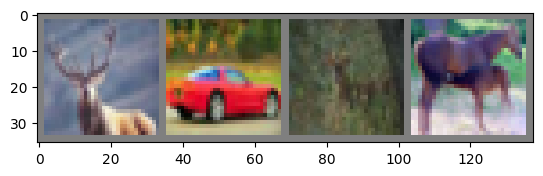

deer  car   deer  horse
[1,  2000] loss: 18.105
[1,  4000] loss: 12.982
[1,  6000] loss: 11.008
[1,  8000] loss: 9.953
[1, 10000] loss: 9.199
[1, 12000] loss: 8.361
[2,  2000] loss: 7.734
[2,  4000] loss: 7.376
[2,  6000] loss: 7.135
[2,  8000] loss: 6.672
[2, 10000] loss: 6.622
[2, 12000] loss: 6.451
Finished Training


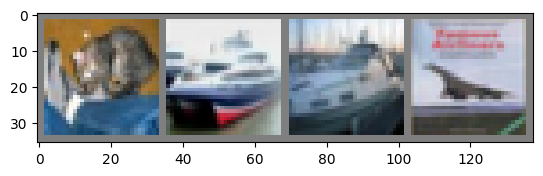

GroundTruth:  cat   ship  ship  plane
Predicted:  cat   truck ship  plane
Accuracy of the classifier on the 10000 test images: 27 %
Accuracy for class: plane is 35.7 %
Accuracy for class: car   is 33.8 %
Accuracy for class: bird  is 19.7 %
Accuracy for class: cat   is 18.3 %
Accuracy for class: deer  is 27.3 %
Accuracy for class: dog   is 22.7 %
Accuracy for class: frog  is 14.7 %
Accuracy for class: horse is 29.5 %
Accuracy for class: ship  is 34.5 %
Accuracy for class: truck is 37.1 %
cpu


In [15]:

import torch
import torchvision
import torchvision.transforms as transforms

"""The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].

<div class="alert alert-info"><h4>Note</h4><p>If running on Windows and you get a BrokenPipeError, try setting
    the num_worker of torch.utils.data.DataLoader() to 0.</p></div>
"""

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

"""Let us show some of the training images, for fun.


"""

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

"""### 2. Define your linear classifer
Define your linear classfier here.


"""
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, ipt_sze, numb_clss):
        super(Net, self).__init__()
        # Define weights and biases manually
        self.wghts1 = nn.Parameter(torch.randn(ipt_sze, 10))
        self.bas1 = nn.Parameter(torch.randn(10))


    def forward(self, x):
        # First linear layer without using nn.Linear
        x = x.view(x.size(0),-1)
        x = torch.add(torch.matmul(x, self.wghts1), self.bas1.view(1, -1))

        # Apply ReLU activation




        # Optionally, apply log softmax for classification
        x = F.log_softmax(x, dim=1)

        return x



# Example: Create an instance of the Net class for 10 input features and 3 output classes
net = Net(ipt_sze=3072, numb_clss=10)

"""### 3. Define a Loss function and optimizer
For example, let's use a Classification Cross-Entropy loss and SGD with momentum. Notice that if you need to use different loss functions.


"""

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

"""### 4. Train the classifier

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
classifier and optimize.


"""

for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Reshape the inputs to match the network's expected input size
        inputs = inputs.view(inputs.size(0), -1)  # Reshape to [batch_size, num_features]

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

"""Let's quickly save our trained model:


"""

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

"""See [here](https://pytorch.org/docs/stable/notes/serialization.html)
for more details on saving PyTorch models.

### 5. Test the classifier on the test data

We have trained the classifier for 2 passes over the training dataset.
But we need to check if the classifier has learnt anything at all.

We will check this by predicting the class label that the classifier
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.


"""

dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

"""Next, let's load back in our saved model (note: saving and re-loading the model
wasn't necessary here, we only did it to illustrate how to do so):


"""

net = Net(ipt_sze=3072,numb_clss=10)
net.load_state_dict(torch.load(PATH))

"""Okay, now let us see what the classifier thinks these examples above are:


"""

images = images.view(images.size(0), -1)  # or images.reshape(images.size(0), -1)
outputs = net(images)

"""The outputs are energies for the 10 classes.
The higher the energy for a class, the more the classifier
thinks that the image is of the particular class.
So, let's get the index of the highest energy:


"""

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

"""The results seem pretty good.

Let us look at how the classifier performs on the whole dataset.


"""

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the classifier
        images = images.view(images.size(0), -1)
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the classifier on the 10000 test images: {100 * correct // total} %')

"""That looks way better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the classifier learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:


"""

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.view(images.size(0), -1)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

"""Okay, so what next?

How do we run it on the GPU?

## Training on GPU (optional)
Just like how you transfer a Tensor onto the GPU, you transfer the classifier onto the GPU.

Let's first define our device as the first visible cuda device if we have
CUDA available:


"""

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

del dataiter

